# Experiment 4: Feature Selection

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df= pd.read_csv("Data/lab4.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Task 1: Univariate Selection

Use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the above dataset which is used for Mobile Price Range Prediction.

In [4]:
df1=df.copy()

In [5]:
y = df1['price_range']
df1.drop(['price_range'], axis=1, inplace=True)
# Feature selection
selector = SelectKBest(chi2, k=10)
X_new =selector.fit_transform(df1, y)
# Convert the selected features to a DataFrame
selected_features = selector.get_support(indices=True)
feature_names = df1.columns[selected_features]
X_new = pd.DataFrame(X_new, columns=feature_names)
X_new

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842.0,1.0,7.0,188.0,20.0,756.0,2549.0,9.0,7.0,19.0
1,1021.0,0.0,53.0,136.0,905.0,1988.0,2631.0,17.0,3.0,7.0
2,563.0,2.0,41.0,145.0,1263.0,1716.0,2603.0,11.0,2.0,9.0
3,615.0,0.0,10.0,131.0,1216.0,1786.0,2769.0,16.0,8.0,11.0
4,1821.0,13.0,44.0,141.0,1208.0,1212.0,1411.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...
1995,794.0,0.0,2.0,106.0,1222.0,1890.0,668.0,13.0,4.0,19.0
1996,1965.0,0.0,39.0,187.0,915.0,1965.0,2032.0,11.0,10.0,16.0
1997,1911.0,1.0,36.0,108.0,868.0,1632.0,3057.0,9.0,1.0,5.0
1998,1512.0,4.0,46.0,145.0,336.0,670.0,869.0,18.0,10.0,19.0


# Task 2: Feature Importance

Load the dataset again and use Extra Tree Classifier for extracting the top 10 features for the dataset and plot your results.

In [6]:
df2=df.copy()

In [7]:
y = df2['price_range']
df2.drop(['price_range'], axis=1, inplace=True)

In [8]:
model = ExtraTreesClassifier()
model.fit(df2, y)

ExtraTreesClassifier()

In [9]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = df2.columns[indices][:10]
top_features

Index(['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt',
       'int_memory', 'talk_time', 'sc_w', 'pc', 'n_cores'],
      dtype='object')

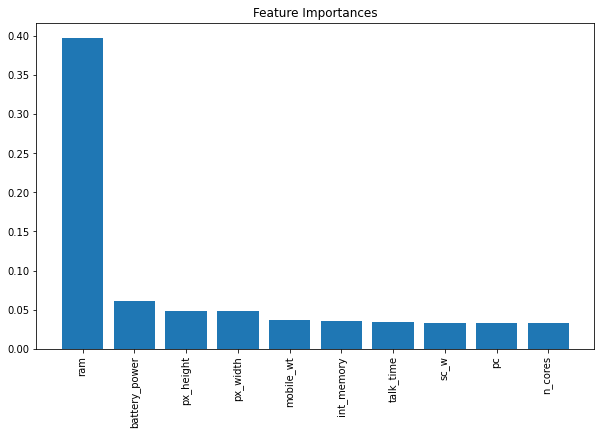

In [10]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), top_features, rotation=90)
plt.show()

# Task 3: Correlation Matrix with Heatmap

Load the dataset and plot heatmap of correlated features using the seaborn library.

In [11]:
df3=df.copy()

## Plot Heatplot

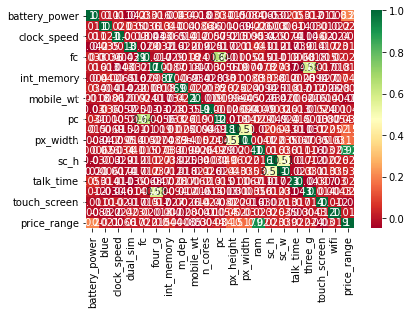

In [12]:
corrmat = df3.corr()
g=sns.heatmap(corrmat , annot=True, cmap="RdYlGn")